# Intro to Regression Lab with TensorFlow Keras

**OBJECTIVES**

- Build regression models using `tensorflow.keras`
- Refine models adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

In [3]:
cali.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
cali.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
cali.target_names

['MedHouseVal']

Hi Sasha,

Thank you for your purchase! I wanted to make sure your order arrived with no issues.

If you are satisfied with your purchase, please consider leaving a review. =)

Thank you!### Problem 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [7]:
cali_df = pd.DataFrame(cali.data, columns = cali.feature_names)
cali_df['price'] = cali.target

In [8]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Problem 2

Create a train/test split with just the `MedInc` feature as your input.

In [64]:
X = cali_df[['MedInc']]
y = cali_df['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Standard Scale your data.

In [66]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Problem 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [67]:
model = Sequential()
model.add(Input(X_train_scaled.shape[1],))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1))

### Problem 3

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [68]:
model.compile(optimizer = 'adam',
              loss = 'mae',
              metrics = 'mse')

### Problem 4

Fit the model on the training data with 100 epochs (silence the output with `verbose = 0`). Save the fit model to the variable `history`.

In [69]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs = 100,
    verbose = 0
)

### Problem 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

''

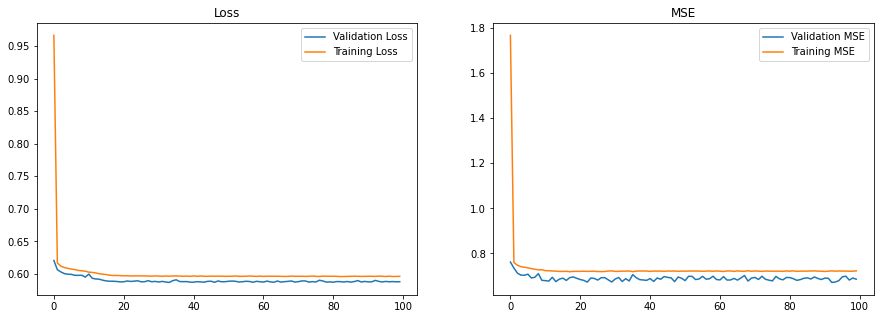

In [70]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(history.history['val_loss'], label = 'Validation Loss')
ax[0].plot(history.history['loss'], label = 'Training Loss')
ax[0].legend()
ax[0].set_title('Loss')

ax[1].plot(history.history['val_mse'], label = 'Validation MSE')
ax[1].plot(history.history['mse'], label = 'Training MSE')
ax[1].legend()
ax[1].set_title('MSE')

;

### Problem 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if that helps the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and `relu` activation functions.

In [72]:
X2 = cali_df.drop(columns = 'price')
y2 = cali_df['price']

In [73]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [74]:
X2_train_scaled = ss.fit_transform(X2_train)
X2_test_scaled = ss.transform(X2_test)

In [75]:
model2 = Sequential()
model2.add(Input(X2_train_scaled.shape[1],))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))

model2.compile(optimizer = 'adam',
              loss = 'mae',
              metrics = 'mse')

history2 = model2.fit(
    X2_train_scaled,
    y2_train,
    validation_data = (X2_test_scaled, y2_test),
    epochs = 100,
    verbose = 0
)

''

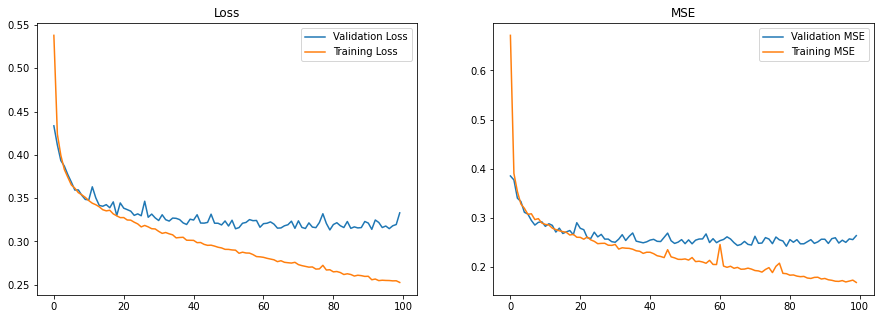

In [76]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(history2.history['val_loss'], label = 'Validation Loss')
ax[0].plot(history2.history['loss'], label = 'Training Loss')
ax[0].legend()
ax[0].set_title('Loss')

ax[1].plot(history2.history['val_mse'], label = 'Validation MSE')
ax[1].plot(history2.history['mse'], label = 'Training MSE')
ax[1].legend()
ax[1].set_title('MSE')

;

### Problem 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.  Does this change anything?

In [78]:
from tensorflow.keras.layers import BatchNormalization

In [79]:
model3 = Sequential()
model3.add(Input(X2_train_scaled.shape[1],))
model3.add(BatchNormalization())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))

model3.compile(optimizer = 'adam',
              loss = 'mae',
              metrics = 'mse')

history3 = model3.fit(
    X2_train_scaled,
    y2_train,
    validation_data = (X2_test_scaled, y2_test),
    epochs = 100,
    verbose = 0
)

''

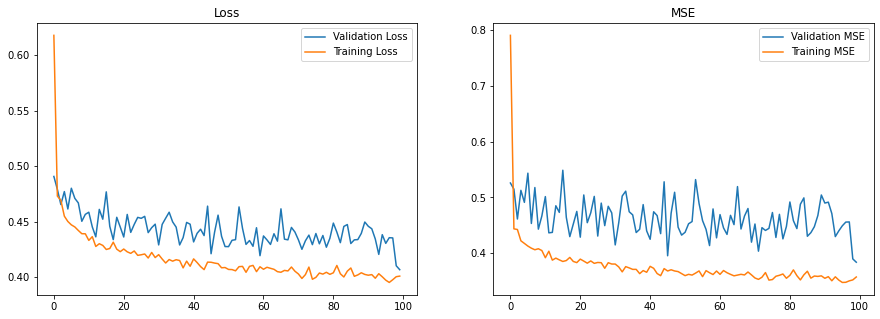

In [80]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(history3.history['val_loss'], label = 'Validation Loss')
ax[0].plot(history3.history['loss'], label = 'Training Loss')
ax[0].legend()
ax[0].set_title('Loss')

ax[1].plot(history3.history['val_mse'], label = 'Validation MSE')
ax[1].plot(history3.history['mse'], label = 'Training MSE')
ax[1].legend()
ax[1].set_title('MSE')

;

Yes, it helped to not overfit the model as much.

### Problem 8

Early Stopping.  It seems that we may not need all 100 epocs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(patience = 5)

model4 = Sequential()
model4.add(Input(X2_train_scaled.shape[1],))
model4.add(BatchNormalization())
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(128, activation = 'relu'))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(1))

model4.compile(optimizer = 'adam',
              loss = 'mae',
              metrics = 'mse')

history4 = model4.fit(
    X2_train_scaled,
    y2_train,
    validation_data = (X2_test_scaled, y2_test),
    epochs = 100,
    verbose = 0,
    callbacks=[early_stop]
)

''

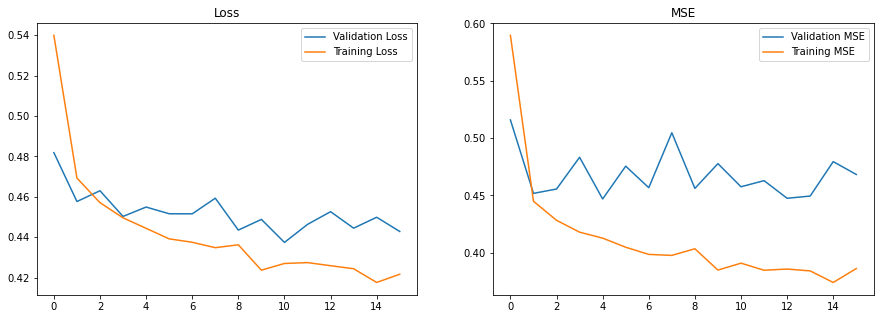

In [84]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(history4.history['val_loss'], label = 'Validation Loss')
ax[0].plot(history4.history['loss'], label = 'Training Loss')
ax[0].legend()
ax[0].set_title('Loss')

ax[1].plot(history4.history['val_mse'], label = 'Validation MSE')
ax[1].plot(history4.history['mse'], label = 'Training MSE')
ax[1].legend()
ax[1].set_title('MSE')

;

### Problem 9

Add `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layers and see if we end up stopping sooner or performing better.

In [85]:
early_stop = EarlyStopping(patience = 5)

model5 = Sequential()
model5.add(Input(X2_train_scaled.shape[1],))
model5.add(BatchNormalization())
model5.add(Dense(64, activation = 'relu'))

model5.add(Dense(128, activation = 'relu'))
model5.add(Dropout(0.05))

model5.add(Dense(64, activation = 'relu'))
model5.add(Dropout(0.20))

model5.add(Dense(1))

model5.compile(optimizer = 'adam',
              loss = 'mae',
              metrics = 'mse')

history5 = model5.fit(
    X2_train_scaled,
    y2_train,
    validation_data = (X2_test_scaled, y2_test),
    epochs = 100,
    verbose = 0,
    callbacks=[early_stop]
)

''

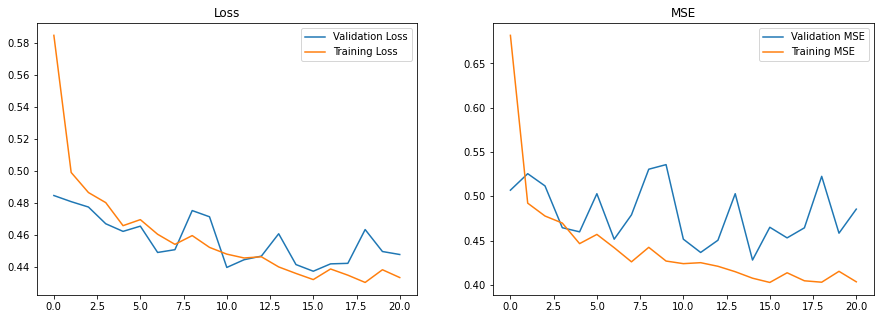

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(history5.history['val_loss'], label = 'Validation Loss')
ax[0].plot(history5.history['loss'], label = 'Training Loss')
ax[0].legend()
ax[0].set_title('Loss')

ax[1].plot(history5.history['val_mse'], label = 'Validation MSE')
ax[1].plot(history5.history['mse'], label = 'Training MSE')
ax[1].legend()
ax[1].set_title('MSE')

;

### Problem 9: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [92]:
preds = model5.predict(X2_test_scaled)
preds

array([[1.9365544],
       [1.6812514],
       [2.3015826],
       ...,
       [1.9143827],
       [2.9975846],
       [0.6825785]], dtype=float32)

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y2_test, preds, squared = False)

0.6967762555573047

In [100]:
null_preds = np.full_like(y2_test, np.mean(y2_test))
null_preds

array([2.06785741, 2.06785741, 2.06785741, ..., 2.06785741, 2.06785741,
       2.06785741])

In [101]:
mean_squared_error(y2_test, null_preds, squared = False)

1.1432468307579953

The model we created performs better than the baseline.
* Model: 0.697 RMSE
* Baseline: 1.143 RMSE

### Problem 10: Regularization

Check whether regularizing will improve the model.  Createa model that is identical to the one above with dropout EXCEPT include `l2` regularization of 0.01 in each of the dense layers.  What is the RMSE of this model?  How does it compare to the baseline?

In [103]:
early_stop = EarlyStopping(patience = 5)

model6 = Sequential()
model6.add(Input(X2_train_scaled.shape[1],))
model6.add(BatchNormalization())
model6.add(Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)))

model6.add(Dense(128, activation = 'relu', kernel_regularizer = l2(0.01)))
model6.add(Dropout(0.05))

model6.add(Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)))
model6.add(Dropout(0.20))

model6.add(Dense(1))

model6.compile(optimizer = 'adam',
              loss = 'mae',
              metrics = 'mse')

history6 = model6.fit(
    X2_train_scaled,
    y2_train,
    validation_data = (X2_test_scaled, y2_test),
    epochs = 100,
    verbose = 0,
    callbacks=[early_stop]
)

In [104]:
reg_preds = model6.predict(X2_test_scaled)
mean_squared_error(y2_test, reg_preds, squared = False)

0.707601193063826

The RMSE is higher than what we had without regularization, but is still higher than the baseline.

### Problem 11: Saving the Model

Save the last model you created as `cali_housing.h5`.  

In [105]:
model6.save('cali_housing.h5')